<a href="https://colab.research.google.com/github/rohailkhan/Acomputer_vision/blob/main/21__Cats_and_dogs_Image_classification_VGG_16_style_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import tensorflow as tf
# libraries for pr-processing and plotting
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
#keras libraries for processing images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory


# for plotting model  and transfer learning
from keras.applications.vgg16 import VGG16
import json
from keras import utils
from keras.layers import Input
#Libraries for CNN
from keras.models import Sequential , Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten, Dropout
# Optimizers
from tensorflow.keras.optimizers import SGD , Adam


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Steps

1.   Create folders of Train and Test data
2.   Each Train/Test folder has Cat and Dog folders
2.   Create Data Generator object for re scaling 
2.   Create Training/Testing Generators with epoch=64 and target size=(200,200) 
2.   Create VGG style model of 3 stages with single Conv2d of 32,64 and 128 followed by Maxpooling of 2,2 and one dropout layer

2.   Fit the Train flow and test flow in the model.fit



 

## To folder

In [3]:
# base_folder='/content/drive/MyDrive/Cat_dog_25002' # for flow to dataframe

base_folder='/content/drive/MyDrive/Cats_dog_10k to folder' # for flow to directory
train_folder='/content/drive/MyDrive/Cats_dog_10k to folder/train'
test_folder='/content/drive/MyDrive/Cats_dog_10k to folder/test'

In [ ]:
c='/content/drive/MyDrive/Cats_dog_10k to folder/train/cats/'
os.listdir(c)[0:3]

['cat.1408.jpg', 'cat.150.jpg', 'cat.12479.jpg']

In [ ]:
a=[ (c + a) for a in os.listdir(c)[0:4]]

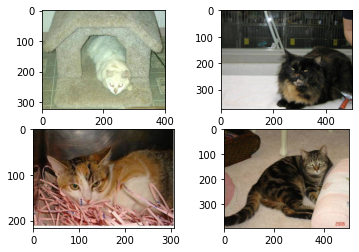

In [ ]:
# plt.subplots is easy choice

k=0
for i in a:
  k=k+1
  plt.subplot(2,2,k)
  plt.imshow(imread(i))

# Improving the 3 layers VGG-16 style Model by using:
# 1 - Pairs of 32,64 and 128 Conv layers
# 2 - a Maxpool and dropout layer (after each pair )
# 3 - a Batch normalization layer after each Conv unit 

In [ ]:
data_gen=ImageDataGenerator(rescale=1.0/255.0)

data_gen_training=data_gen.flow_from_directory(directory=train_folder,target_size=(200,200) ,class_mode='binary'
,batch_size=64)

data_gen_testing=data_gen.flow_from_directory(directory=test_folder,target_size=(200,200) , class_mode='binary'
,batch_size=64)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
from keras.layers import BatchNormalization
def base_model():
  model=Sequential()
  # 1 Conv2d-Maxpool
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,input_shape=(200,200,3),padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  # 2 Conv2d-Maxpool
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  # 3 Conv2d-Maxpool
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  # Final Desne layers
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
  return model
model=base_model()

In [ ]:
history = model.fit(data_gen_training , steps_per_epoch=len(data_gen_testing), verbose=1,validation_data=data_gen_testing
  ,epochs=20)

## Evaluate Model

In [ ]:
loss,acc=model.evaluate(data_gen_testing,steps=len(data_gen_testing) , verbose=1)

32/32 [==============================] - 10s 321ms/step - loss: 0.8208 - accuracy: 0.7435


In [ ]:
print('loss={} and accuracy={}'.format(loss*100,acc*100))

loss=82.0794939994812 and accuracy=74.34999942779541


## Save training history and model

In [ ]:
path='/content/drive/MyDrive/20210309_Files/'
# saving model 
model_path=path +'/catdog_3stage.h5'
model1.save(model_path,overwrite=True)
# saving training history dictionary
history1=history.history
# # Save it under the form of a json file
history_path=path +'/catdog__3stage_history.json'
json.dump(str(history1), open(history_path, 'w'))

In [ ]:
import ast # library to convert saved history from string to dictionary format
path='/content/drive/MyDrive/20210309_Files/'
history_path=path +'/catdog__3stage_history.json'
history1= json.load(open(history_path, 'r'))
# The loaded history is in String format.Converting it back to
# dictionary
history2=ast.literal_eval(history1)

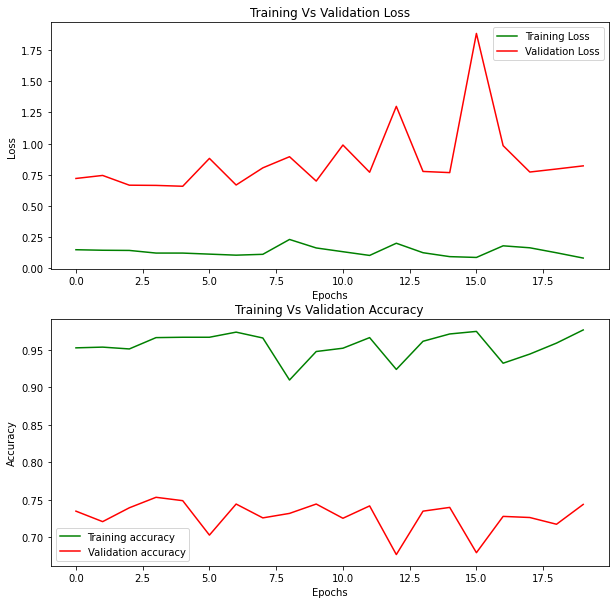

In [ ]:
def plot_diagnostics(history):
    fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
    axx[0].plot(range(0,20),history['loss'],color='green',label='Training Loss')
    axx[0].plot(range(0,20),history['val_loss'], color='red' ,label='Validation Loss')
    axx[0].set_title('Training Vs Validation Loss')
    axx[0].set_ylabel('Loss')
    axx[0].set_xlabel('Epochs')
    axx[0].legend()

    axx[1].plot(range(0,20),history['accuracy'],color='green',label='Training accuracy')
    axx[1].plot(range(0,20),history['val_accuracy'], color='red' ,label='Validation accuracy')
    axx[1].set_title('Training Vs Validation Accuracy')
    axx[1].set_ylabel('Accuracy')
    axx[1].set_xlabel('Epochs')
    axx[1].legend()

    plt.show()
plot_diagnostics(history2)

In [ ]:
p1='/content/drive/MyDrive/20210309_Datasets/cat.2.jpg'
p2='/content/drive/MyDrive/20210309_Datasets/cat.14.jpg'
p3='/content/drive/MyDrive/20210309_Datasets/dog.jpg'
p4='/content/drive/MyDrive/20210309_Datasets/dog.68.jpg'

## Data Augmentation
### augmentation is done only to the training data

In [ ]:
# base_folder='/content/drive/MyDrive/Cat_dog_25002' # for flow to dataframe

base_folder='/content/drive/MyDrive/Cats_dog_10k to folder' # for flow to directory
train_folder='/content/drive/MyDrive/Cats_dog_10k to folder/train'
test_folder='/content/drive/MyDrive/Cats_dog_10k to folder/test'

In [ ]:
data_gen_augmentation_object=ImageDataGenerator(rescale=1.0/255.0,
width_shift_range=0.2, height_shift_range=0.5, horizontal_flip=True)


In [ ]:
# augmentation is done only to the training data
data_gen_training__augmentation_flow=data_gen_augmentation_object.flow_from_directory(directory=train_folder,batch_size=64,
                                                   target_size=(200,200),class_mode='binary')

Found 8000 images belonging to 2 classes.


In [ ]:
data_gen_testing_object=ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
data_gen_testing_flow=data_gen_testing_object.flow_from_directory(directory=test_folder,target_size=(200,200) , class_mode='binary'
,batch_size=64)

Found 2000 images belonging to 2 classes.


**The rest of procedure is same. Have left it to save time**

# **Using VGG model**

# Using only VGG's classifier part & holding weights of all CNN layers


1.   Remove the classifier part (which is the part which is just BEFORE the flatten layer .
2.   Hold the weights so only our own fully connected layer is trained (using the advantage of the pre-trained weights from VGG-16)
1.   Just add our own Flatten layer and 2 last Dense layers
## How to implement
1.   Just use include_top=False to remove the last classifier part
2.   We should keep the input shape JUST like the input shape of the VGG16 i.e 224,224,3 
2.   We can hold the weights by using a for loop 



In [4]:
from keras.models import Sequential , Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten, Dropout


In [5]:
model = VGG16()
model.summary()

553476096/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [34]:
# define cnn model

model = VGG16(include_top=False, input_shape=(224, 224, 3))
# mark loaded layers as not trainable
for layer in model.layers:
  layer.trainable = False
# add new classifier layers
# flatten layer should be the end of the "output" if the 
# last layers. Last layer is [-1] and output of last layer= model.layers[-1].output. so we have 
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])



In [36]:
# create data generator
# To keep mean value like the VGG first use featurewise_center	Boolean
#Set input mean to 0 over the dataset, feature-wise.
datagen = ImageDataGenerator(featurewise_center=True)
# When the input mean is set to 0, we can just specify imagenet mean values for centering
# These mean values are the mean values of each RGB channel of VGG-16 model
datagen.mean = [123.68, 116.779, 103.939]
# prepare iterator.The iterator will change the mean according to VGG16
# because we are using featurwise_center=True .So it changes
# mean
train_it = datagen.flow_from_directory(train_folder,
class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory(test_folder,
class_mode='binary', batch_size=64, target_size=(224, 224))
# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it),
validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10
125/125 [==============================] - 78s 614ms/step - loss: 0.7400 - accuracy: 0.9474 - val_loss: 0.0757 - val_accuracy: 0.9705
Epoch 2/10
125/125 [==============================] - 76s 606ms/step - loss: 0.0324 - accuracy: 0.9891 - val_loss: 0.0676 - val_accuracy: 0.9745
Epoch 3/10
125/125 [==============================] - 76s 606ms/step - loss: 0.0072 - accuracy: 0.9994 - val_loss: 0.0755 - val_accuracy: 0.9720
Epoch 4/10
125/125 [==============================] - 76s 606ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0829 - val_accuracy: 0.9740
Epoch 5/10
125/125 [==============================] - 76s 605ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0859 - val_accuracy: 0.9740
Epoch 6/10
125/125 [==============================] - 76s 605ms/step - loss: 9.0874e-04 - accuracy: 1.0000 - val_loss: 0.0908 - val_accuracy: 0.9745
Epoch 7/10
125/125 [======================

### Evaluate the Model

In [44]:
losses,accuracy= model.evaluate(test_it, steps=len(test_it), verbose=1)
print("=============================================================================")
print('Final modal loss={} , accuracy={}'.format(losses,accuracy*100))

32/32 [==============================] - 16s 474ms/step - loss: 0.0974 - accuracy: 0.9755
Final modal loss=0.09735533595085144 , accuracy=97.54999876022339


## Saving Training History and the model

In [52]:
path='/content/drive/MyDrive/20210309_Files/'
# saving model 
model_path=path +'/catdog_VGG-16.h5'
model.save(model_path,overwrite=True)
# saving training history dictionary
history1=history.history
# # Save it under the form of a json file
history_path=path +'/catdog_VGG-16_history.json'
json.dump(str(history1), open(history_path, 'w'))

In [59]:
## loading saved history
import ast # library to convert saved history from string to dictionary format
path='/content/drive/MyDrive/20210309_Files/'
history_path=path +'/catdog_VGG-16_history.json'
history1= json.load(open(history_path, 'r'))
# The loaded history is in String format.Converting it back to
# dictionary
history1=ast.literal_eval(history1)

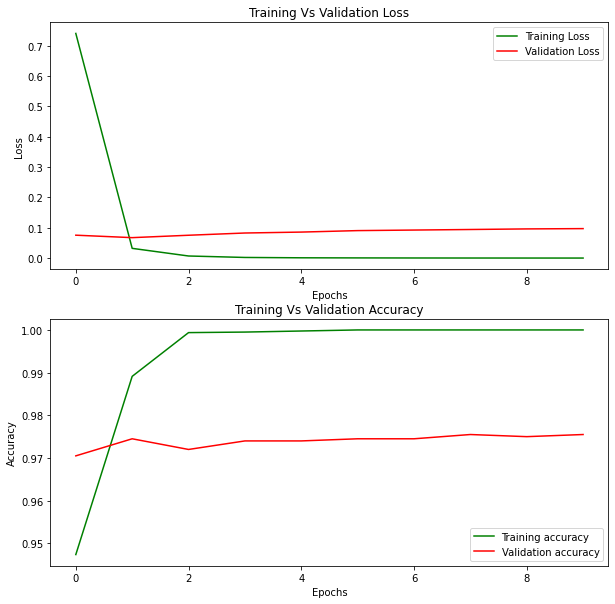

In [54]:
def plot_diagnostics(history):
    fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
    axx[0].plot(history['loss'],color='green',label='Training Loss')
    axx[0].plot(history['val_loss'], color='red' ,label='Validation Loss')
    axx[0].set_title('Training Vs Validation Loss')
    axx[0].set_ylabel('Loss')
    axx[0].set_xlabel('Epochs')
    axx[0].legend()

    axx[1].plot(history['accuracy'],color='green',label='Training accuracy')
    axx[1].plot(history['val_accuracy'], color='red' ,label='Validation accuracy')
    axx[1].set_title('Training Vs Validation Accuracy')
    axx[1].set_ylabel('Accuracy')
    axx[1].set_xlabel('Epochs')
    axx[1].legend()

    plt.show()
plot_diagnostics(history1)

# Further model improvement by using the FULL DATA for training
The model can be further tunes by combining both the training and testing data. (But it is not done in this notebook to save time)

# Predicting class of a sample photo


1.   Load photos with target size equal to the VGG-16 input i.e 224,224
2.   Reshape according to VGG-16
3.   Center pixel data according to VGG-16 mean values for each channel [123.68, 116.779, 103.939]



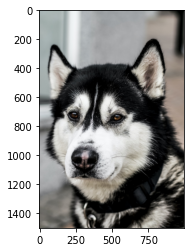

In [60]:
sample='/content/drive/MyDrive/20210309_Datasets/dog.jpg'
plt.imshow(imread(sample))
plt.show()

In [61]:
path='/content/drive/MyDrive/20210309_Files/'

model_path=path +'/catdog_VGG-16.h5'

In [64]:
import tensorflow as tf
# load model
model = tf.keras.models.load_model(model_path)

In [74]:
img1=tf.keras.utils.load_img(sample,target_size=(224,224))
img=tf.keras.utils.img_to_array(img1)
img.shape

(224, 224, 3)

In [75]:
img=img.reshape(1,224,224,3)
img.shape

(1, 224, 224, 3)

In [76]:
img=img.astype('float32')
img=img - [123.68, 116.779, 103.939]

## If the prediction is close to 1 ,then its a dog.

In [77]:
model.predict(img)

array([[0.999997]], dtype=float32)

# **Correct Result as Dog which is close to 1**